# Initialize

In [1]:
%cd "/local_data/scratch/rtorre/projects/JetNetDataMetrics"

/local_data/scratch/rtorre/projects/JetNetDataMetrics


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-06-17 09:36:30.495047: Importing os...
2024-06-17 09:36:30.495183: Importing sys...
Visible devices: [0]
2024-06-17 09:36:30.495436: Importing timer from timeit...
2024-06-17 09:36:30.495507: Setting env variables for tf import (only device(s) [0] will be available)...
2024-06-17 09:36:30.495637: Importing numpy...
2024-06-17 09:36:30.609203: Importing matplotlib...
2024-06-17 09:36:30.948707: Importing h5py...
2024-06-17 09:36:30.972160: Importing importlib.util...
2024-06-17 09:36:30.972271: Importing json...
2024-06-17 09:36:30.972339: Importing pandas...
2024-06-17 09:36:31.277500: Importing random...
2024-06-17 09:36:31.277643: Importing scipy utils...
2024-06-17 09:36:31.590694: Importing subprocess...
2024-06-17 09:36:31.590842: Importing textwrap...
2024-06-17 09:36:31.590914: Importing tensorflow...
Tensorflow version: 2.12.0
2024-06-17 09:36:33.500931: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-06-17 09:36:33.764993: Importing timeit.

# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


# Jet level

## Init data

In [6]:
results_dir = "results/jet_features/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories waere created")

In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_jet_features(jet_features):
    p_T_jet = jet_features[:,1]
    eta_jet = jet_features[:,2]
    m_jet = jet_features[:,3]
    m_jet_over_p_T_jet = m_jet / p_T_jet
    return tf.stack([p_T_jet, eta_jet, m_jet, m_jet_over_p_T_jet], axis=1)

jet_features_reduced = get_reduced_jet_features(jet_features)
jet_features_reduced.shape

TensorShape([177252, 4])

## Plots

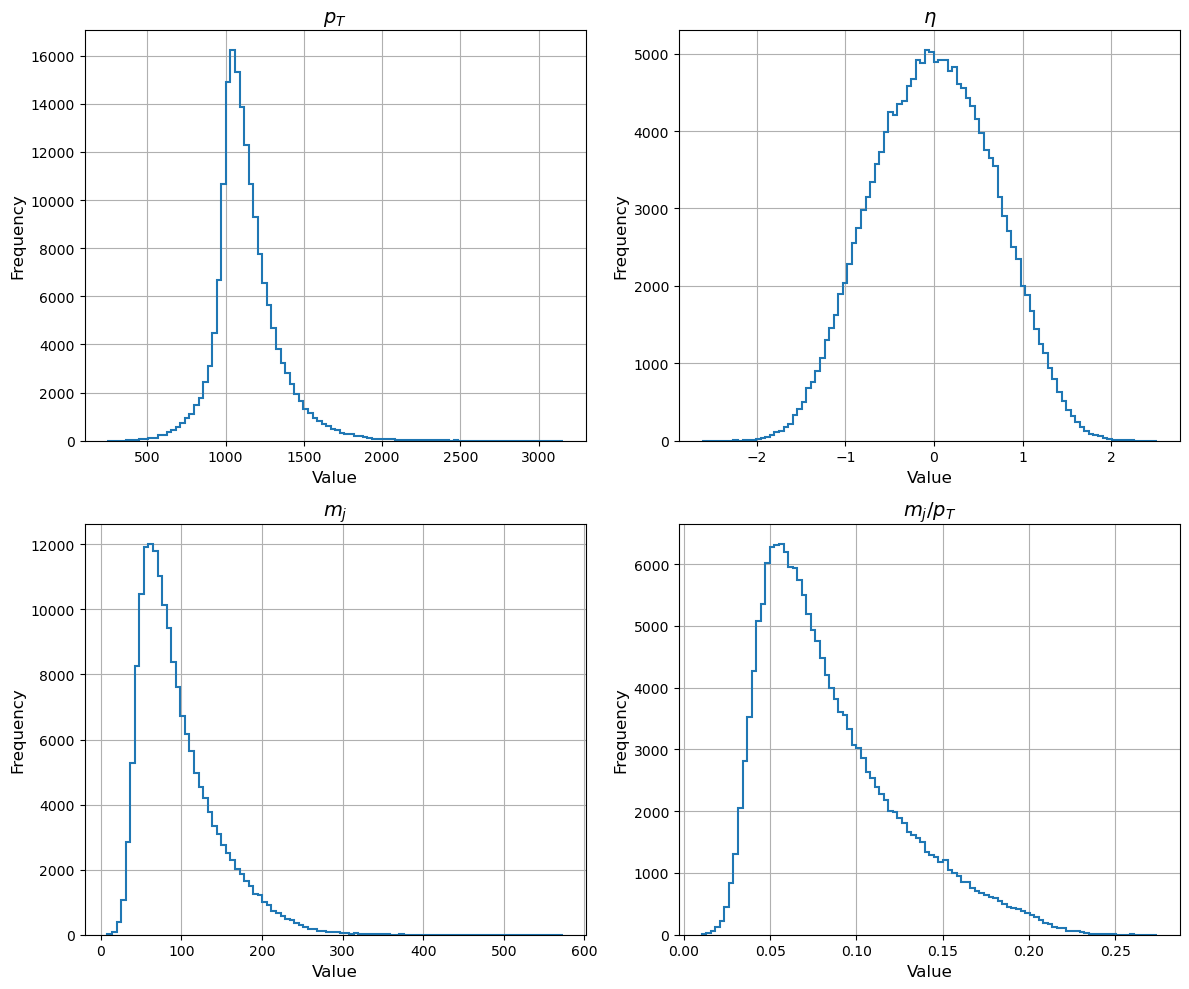

In [8]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', linewidth=1.5)
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
mean = tf.reduce_mean(jet_features_reduced, axis=0)
std = tf.math.reduce_std(jet_features_reduced, axis=0)

eps_mu = 0.5
eps_sigma = 0.2
eps_sigma_off_diag = 0.2
eps_power_plus = 0.1
eps_power_minus = 0.1
eps_shift_normal = 0.2
eps_shift_uniform = 0.2

preprocessed_jet_features_reduced = preprocess_data(jet_features_reduced, mean, std)
deformed1 = deform_mean(preprocessed_jet_features_reduced,
                        eps = eps_mu,
                        seed = 0)
deformed2 = deform_cov_diag(preprocessed_jet_features_reduced,
                            eps = eps_sigma,
                            seed = 0)
deformed3 = deform_cov_off_diag(preprocessed_jet_features_reduced,
                                eps = eps_sigma_off_diag,
                                seed = 0)
deformed4 = deform_power_abs(preprocessed_jet_features_reduced,
                             eps = eps_power_plus,
                             direction = "up")
deformed5 = deform_power_abs(preprocessed_jet_features_reduced,
                             eps = eps_power_minus,
                             direction = "down")
deformed6 = deform_random(preprocessed_jet_features_reduced,
                          eps = eps_shift_normal,
                          shift_dist = "normal",
                          seed = 0)
deformed7 = deform_random(preprocessed_jet_features_reduced,
                          eps = eps_shift_uniform,
                          shift_dist = "uniform",
                          seed = 0)
jet_features_deform1_reduced = postprocess_data(deformed1, mean, std)
jet_features_deform2_reduced = postprocess_data(deformed2, mean, std)
jet_features_deform3_reduced = postprocess_data(deformed3, mean, std)
jet_features_deform4_reduced = postprocess_data(deformed4, mean, std)
jet_features_deform5_reduced = postprocess_data(deformed5, mean, std)
jet_features_deform6_reduced = postprocess_data(deformed6, mean, std)
jet_features_deform7_reduced = postprocess_data(deformed7, mean, std)

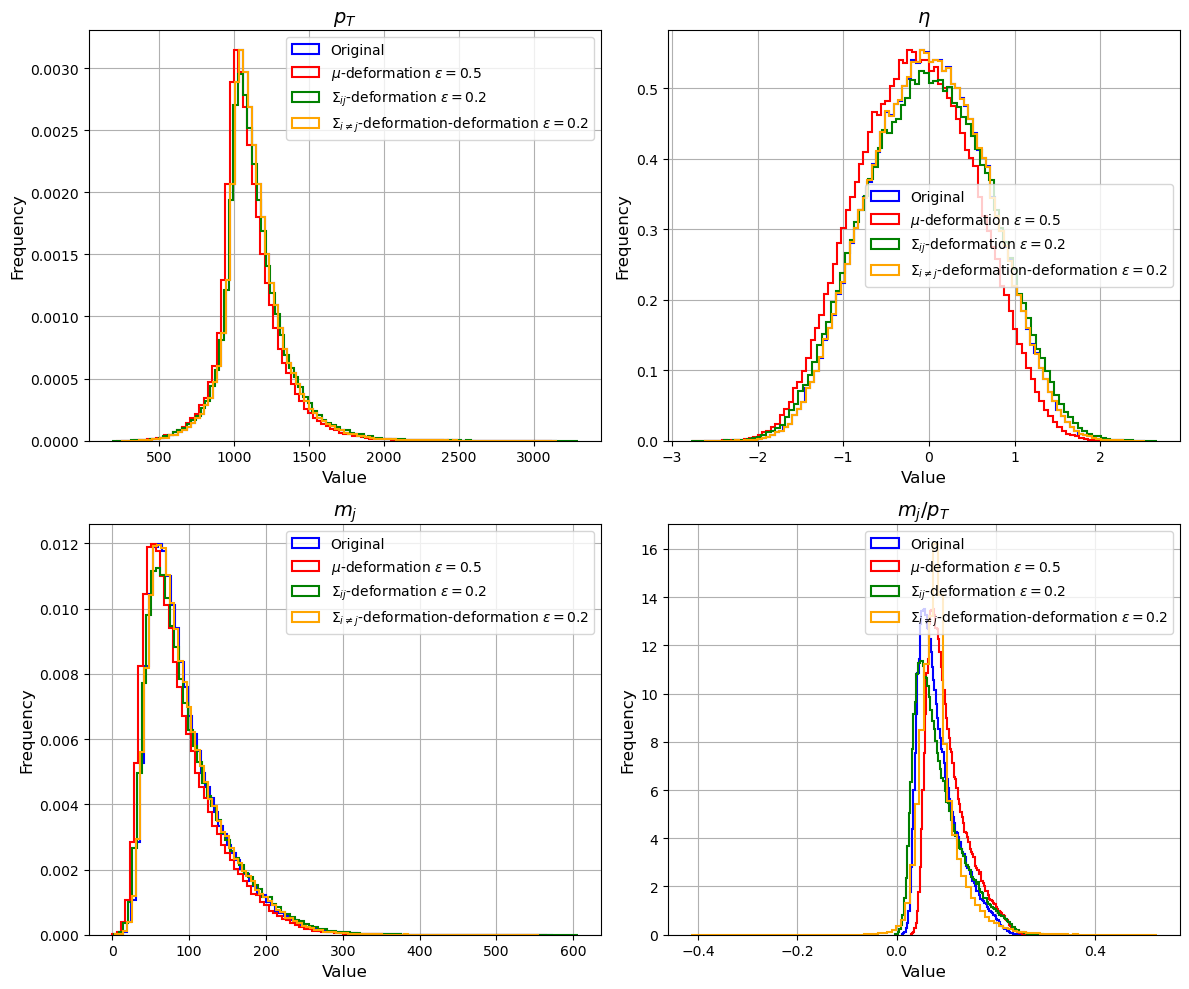

In [10]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='blue', label='Original')
    axs[i].hist(jet_features_deform1_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\mu$-deformation $\epsilon='+str(eps_mu)+'$')
    axs[i].hist(jet_features_deform2_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\Sigma_{ij}$-deformation $\epsilon='+str(eps_sigma)+'$')
    axs[i].hist(jet_features_deform3_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\Sigma_{i\\neq j}$-deformation-deformation $\epsilon='+str(eps_sigma_off_diag)+'$')
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_jet_features_1.png")

# Show the plot
plt.show()

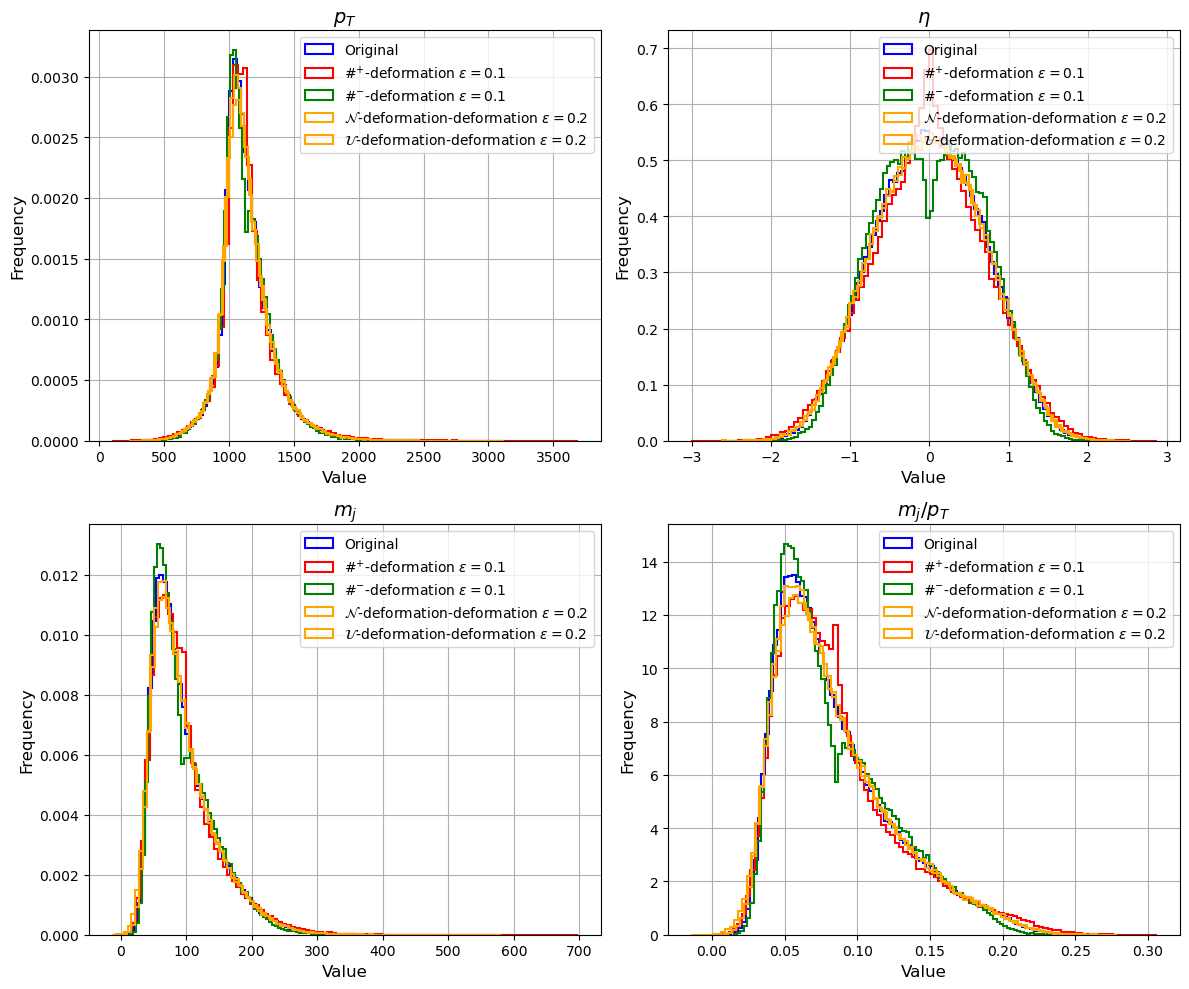

In [11]:
names = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(jet_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(jet_features_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='blue', label='Original')
    axs[i].hist(jet_features_deform4_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\#^{+}$-deformation $\epsilon='+str(eps_power_plus)+'$')
    axs[i].hist(jet_features_deform5_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\#^{-}$-deformation $\epsilon='+str(eps_power_minus)+'$')
    axs[i].hist(jet_features_deform6_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\mathcal{N}$-deformation-deformation $\epsilon='+str(eps_shift_normal)+'$')
    axs[i].hist(jet_features_deform7_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\mathcal{U}$-deformation-deformation $\epsilon='+str(eps_shift_uniform)+'$')
    axs[i].set_title(name, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_jet_features_2.png")

# Show the plot
plt.show()

Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.7344701550900936 s.
Computing HPD quotas...
HPD quotas computed in 0.4096699170768261 s.
Plotting corner plot...


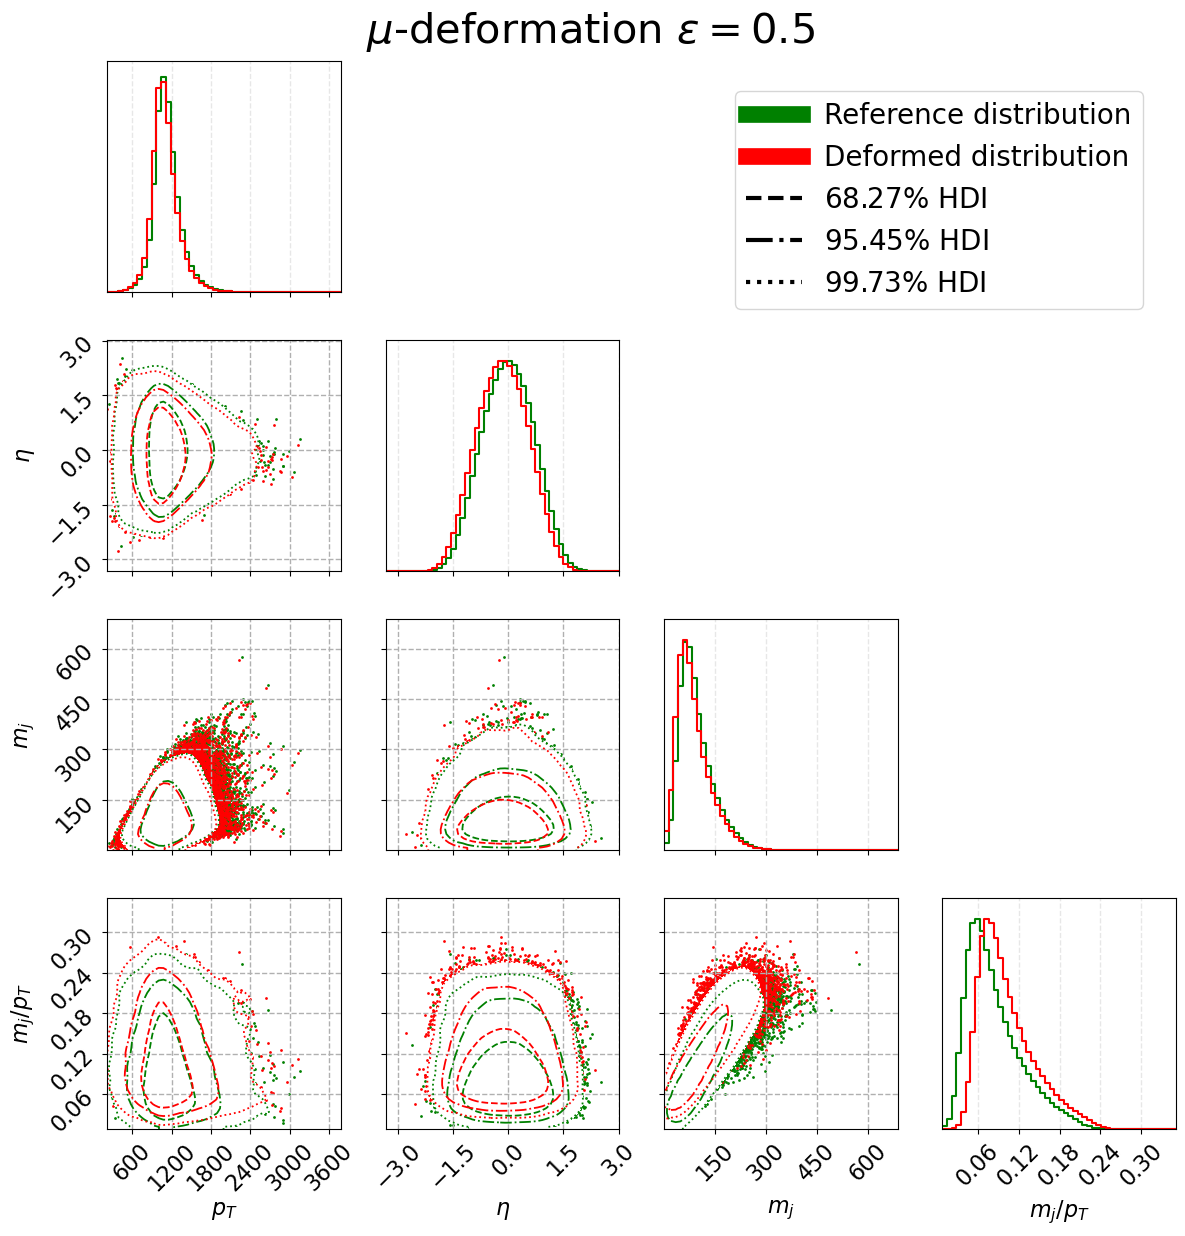

Plot done and saved in 3.480478179641068 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 1.051737330853939 s.
Computing HPD quotas...
HPD quotas computed in 0.4527154453098774 s.
Plotting corner plot...


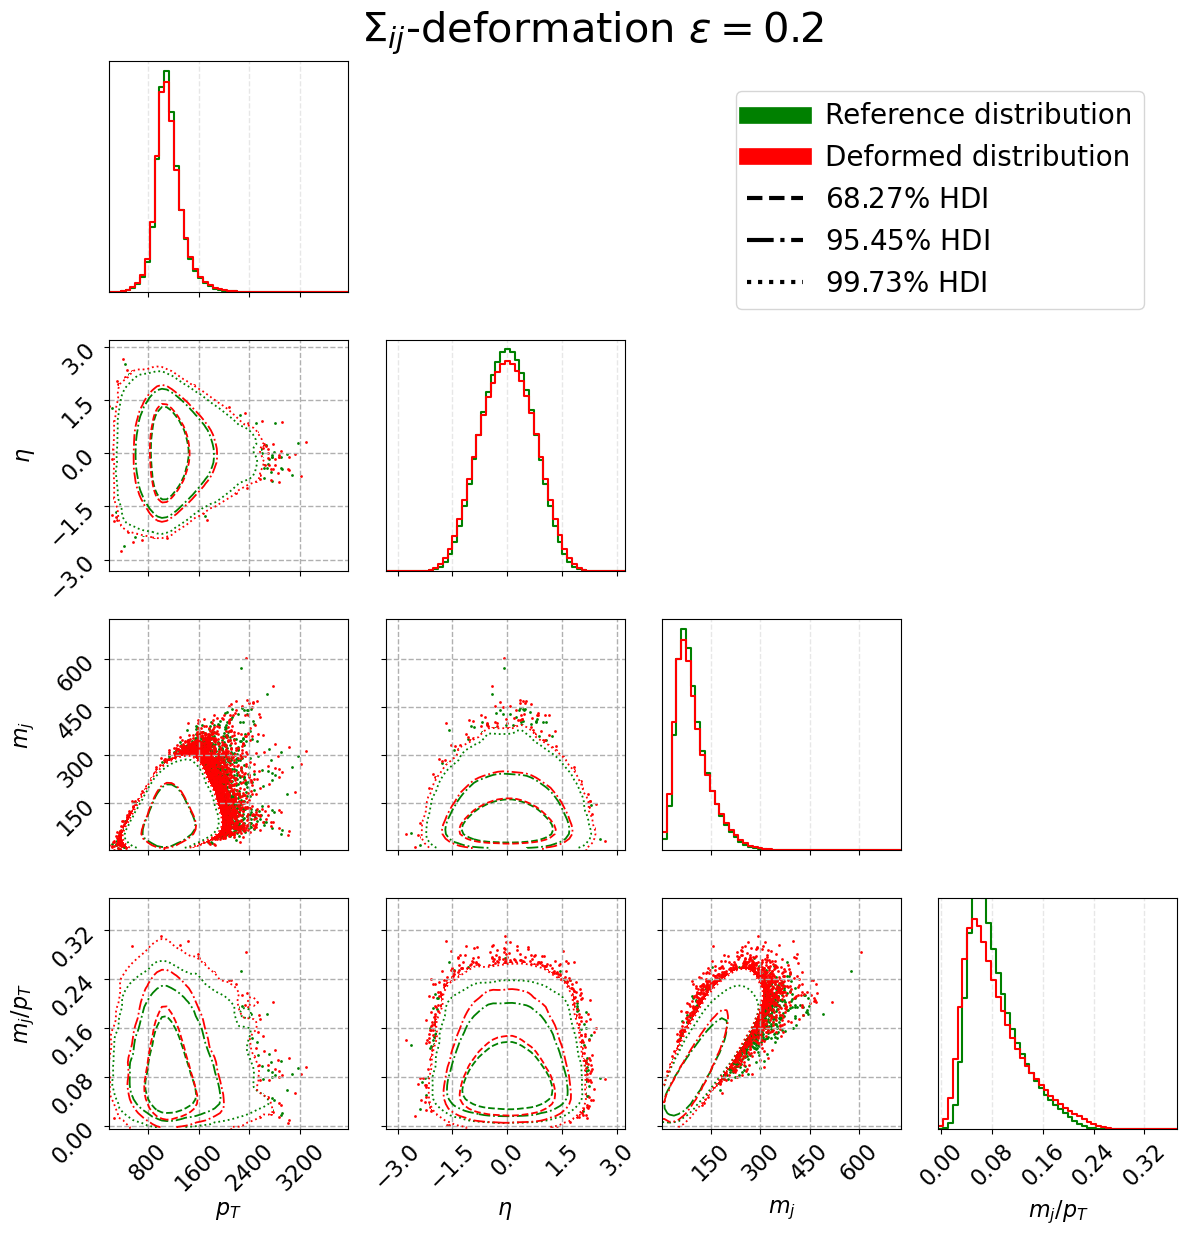

Plot done and saved in 3.812224476598203 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.6646979385986924 s.
Computing HPD quotas...
HPD quotas computed in 0.3967530960217118 s.
Plotting corner plot...


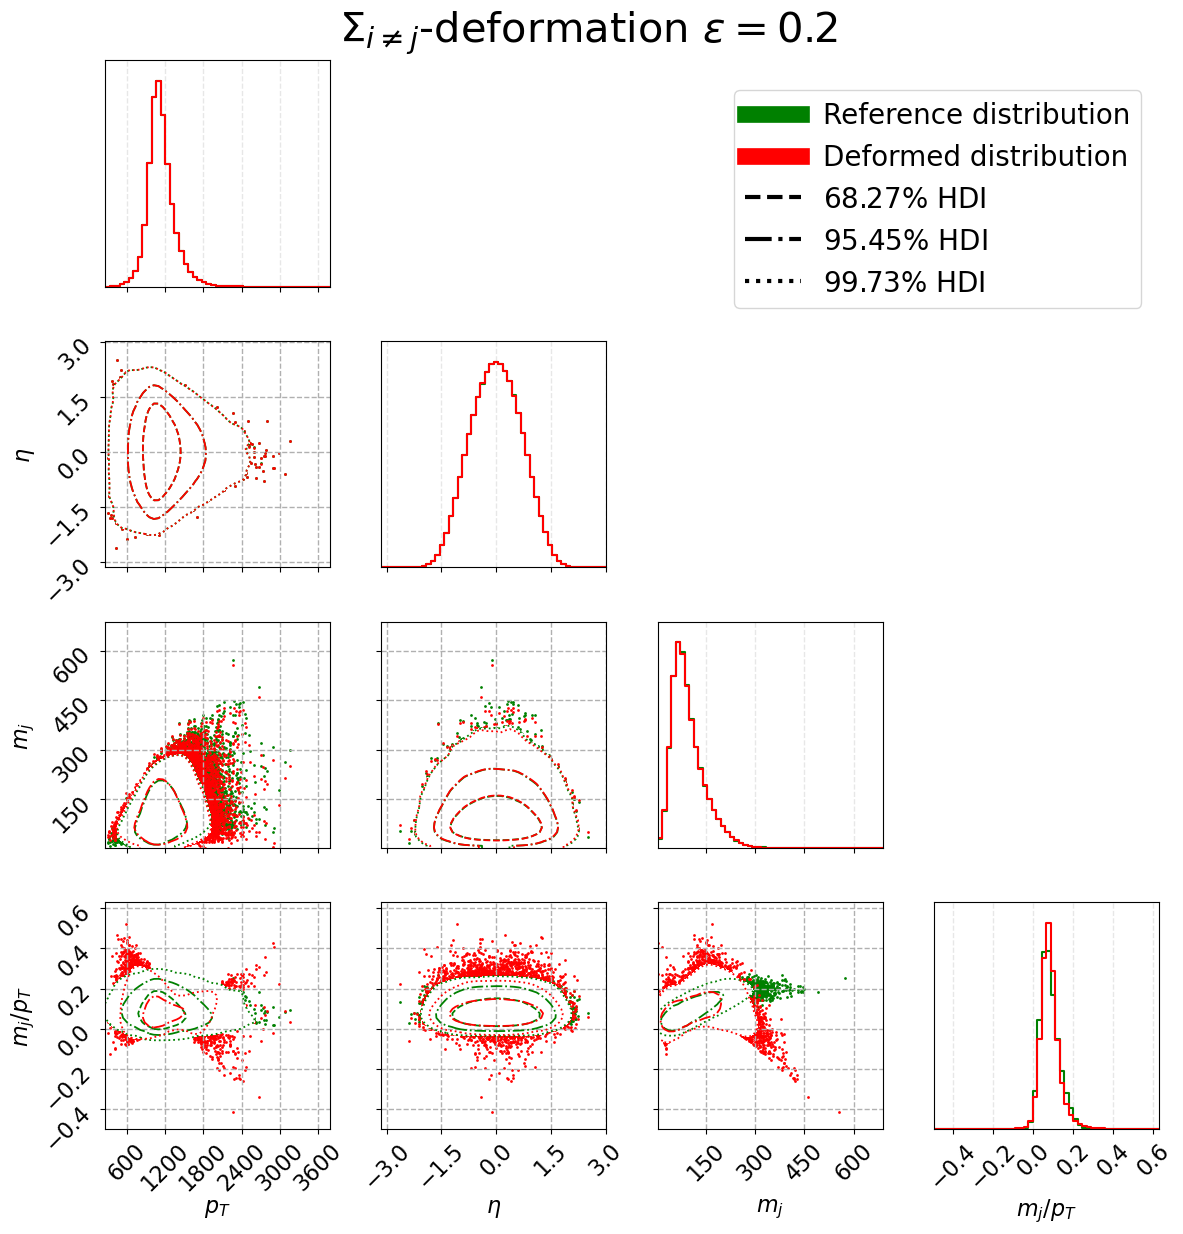

Plot done and saved in 3.8370073456317186 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 1.0916560627520084 s.
Computing HPD quotas...
HPD quotas computed in 0.6122003085911274 s.
Plotting corner plot...


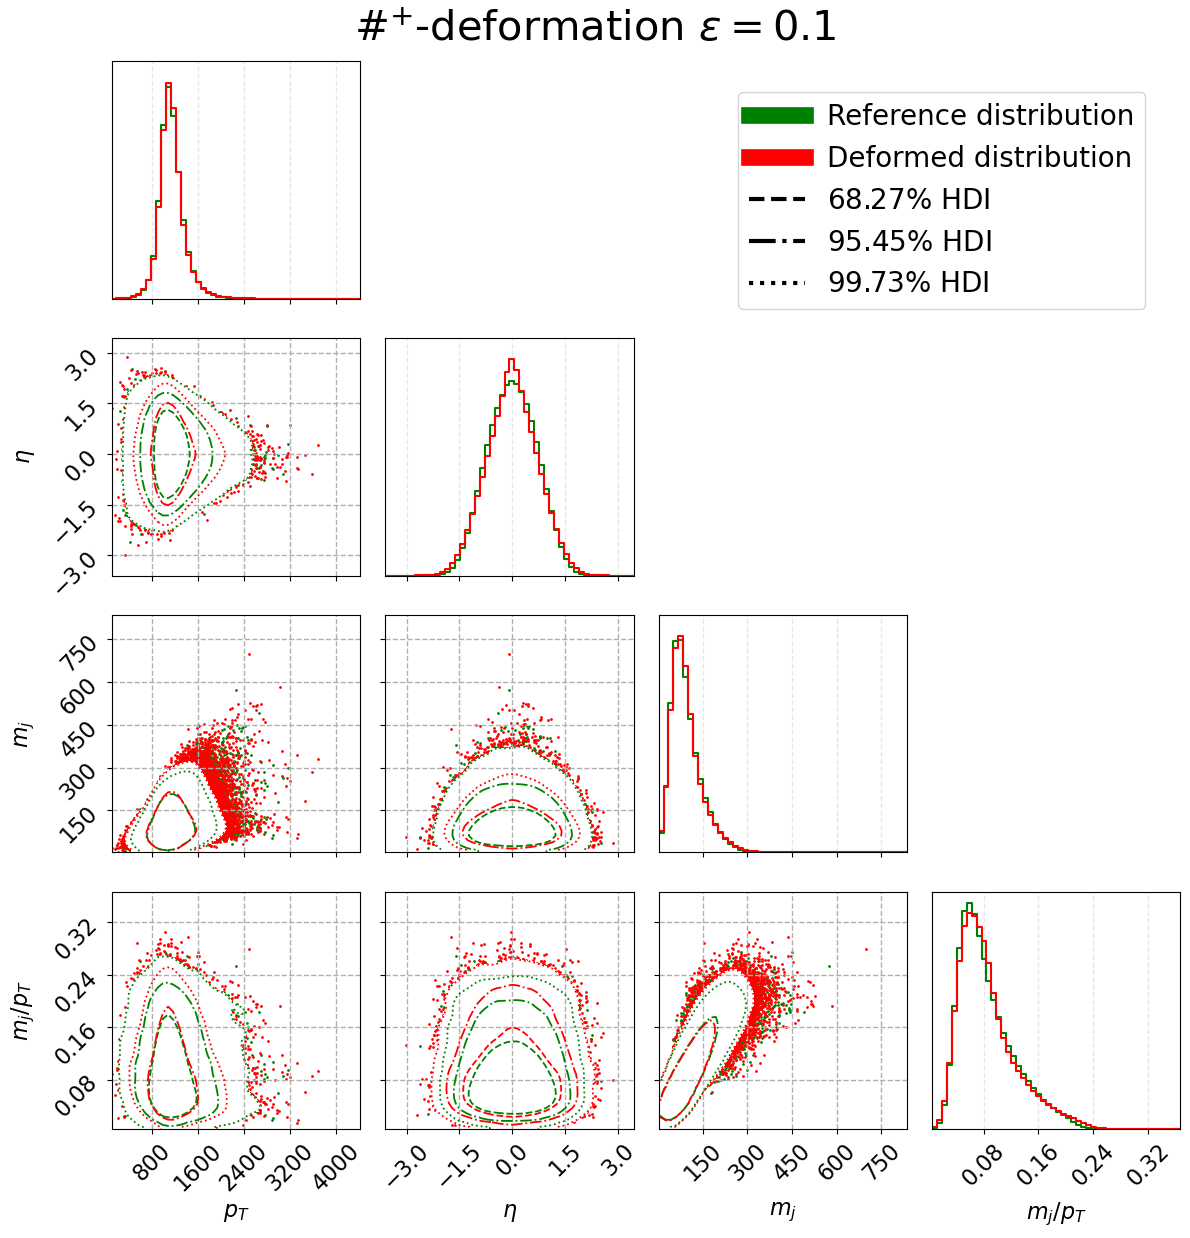

Plot done and saved in 4.653676032088697 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.5926608629524708 s.
Computing HPD quotas...
HPD quotas computed in 0.4264351921156049 s.
Plotting corner plot...


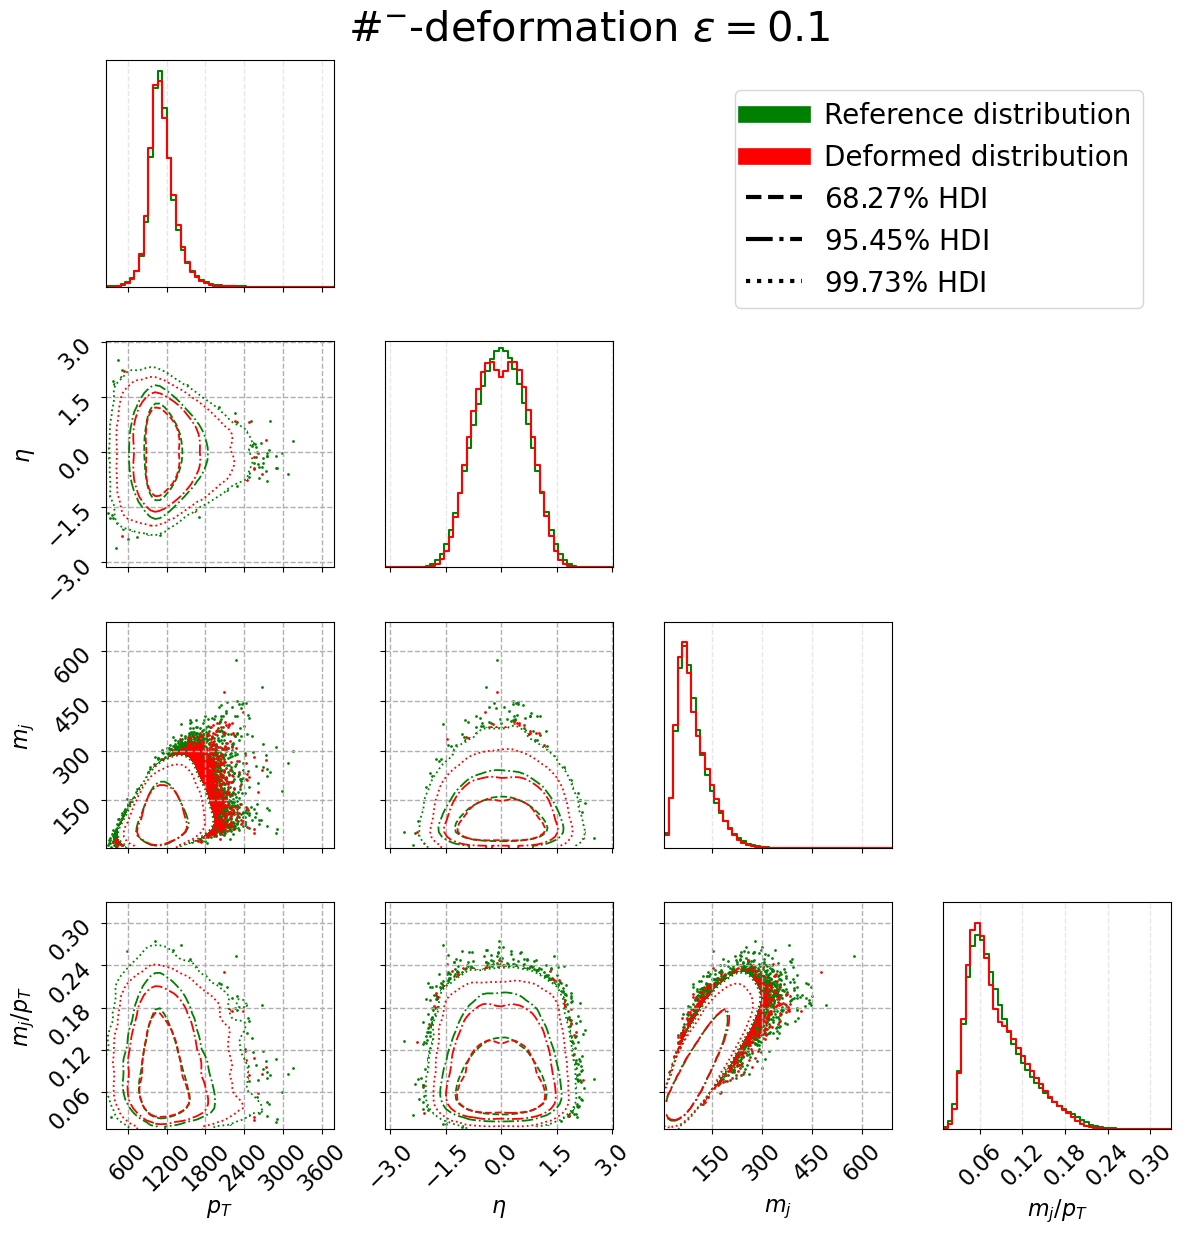

Plot done and saved in 3.352332907728851 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.5701778270304203 s.
Computing HPD quotas...
HPD quotas computed in 0.4088859036564827 s.
Plotting corner plot...


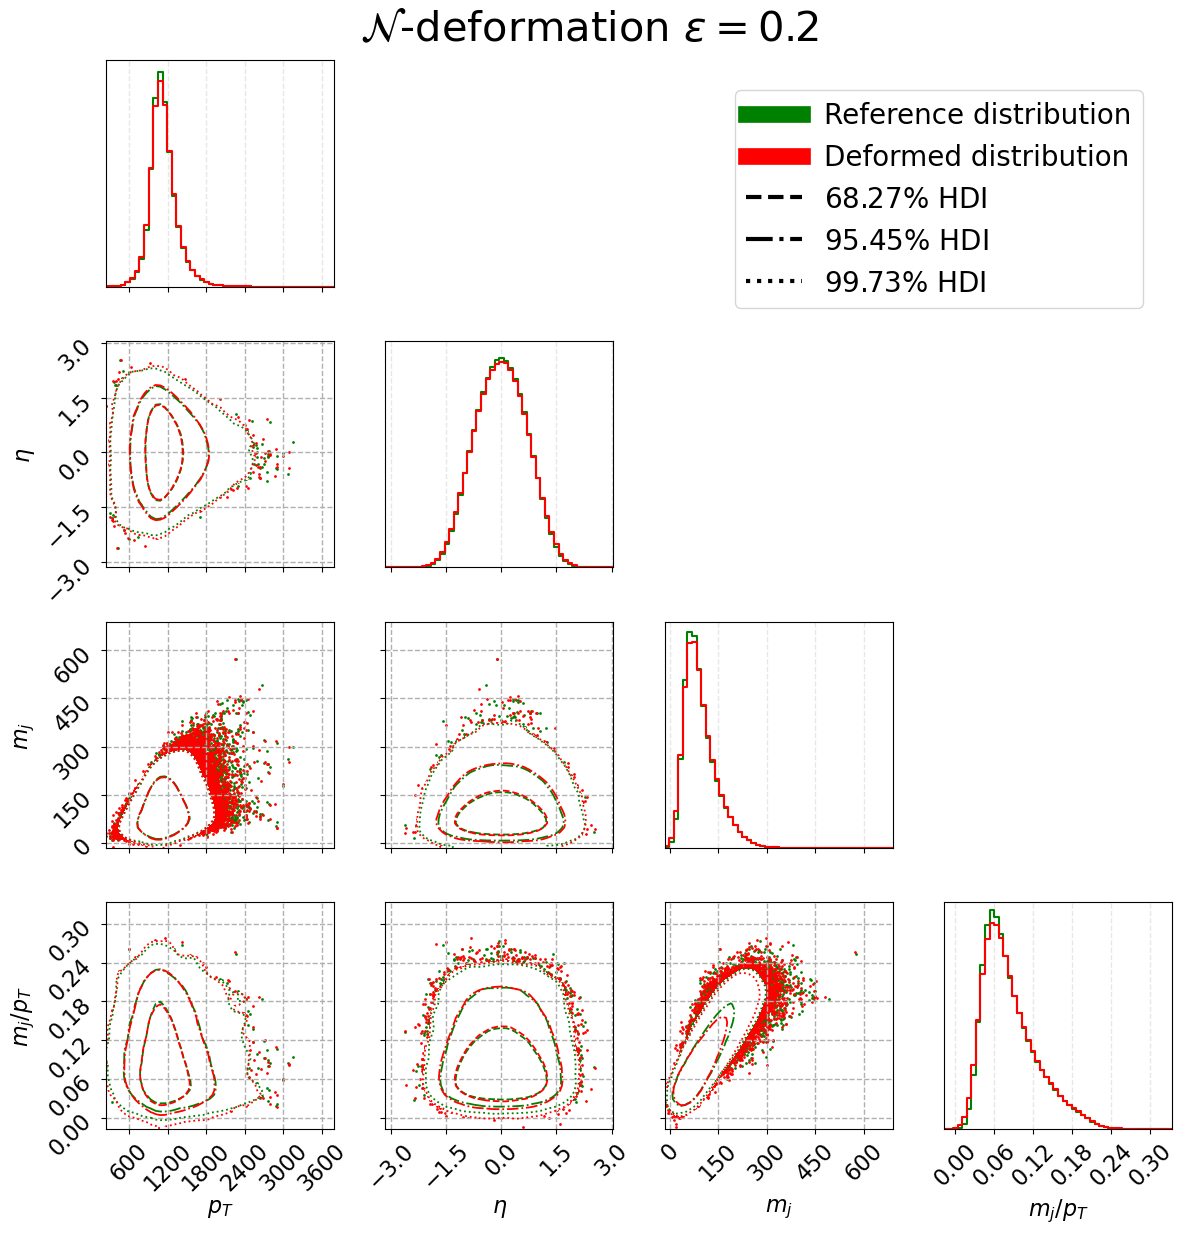

Plot done and saved in 3.319942519068718 s.
Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.5913200005888939 s.
Computing HPD quotas...
HPD quotas computed in 0.4386537540704012 s.
Plotting corner plot...


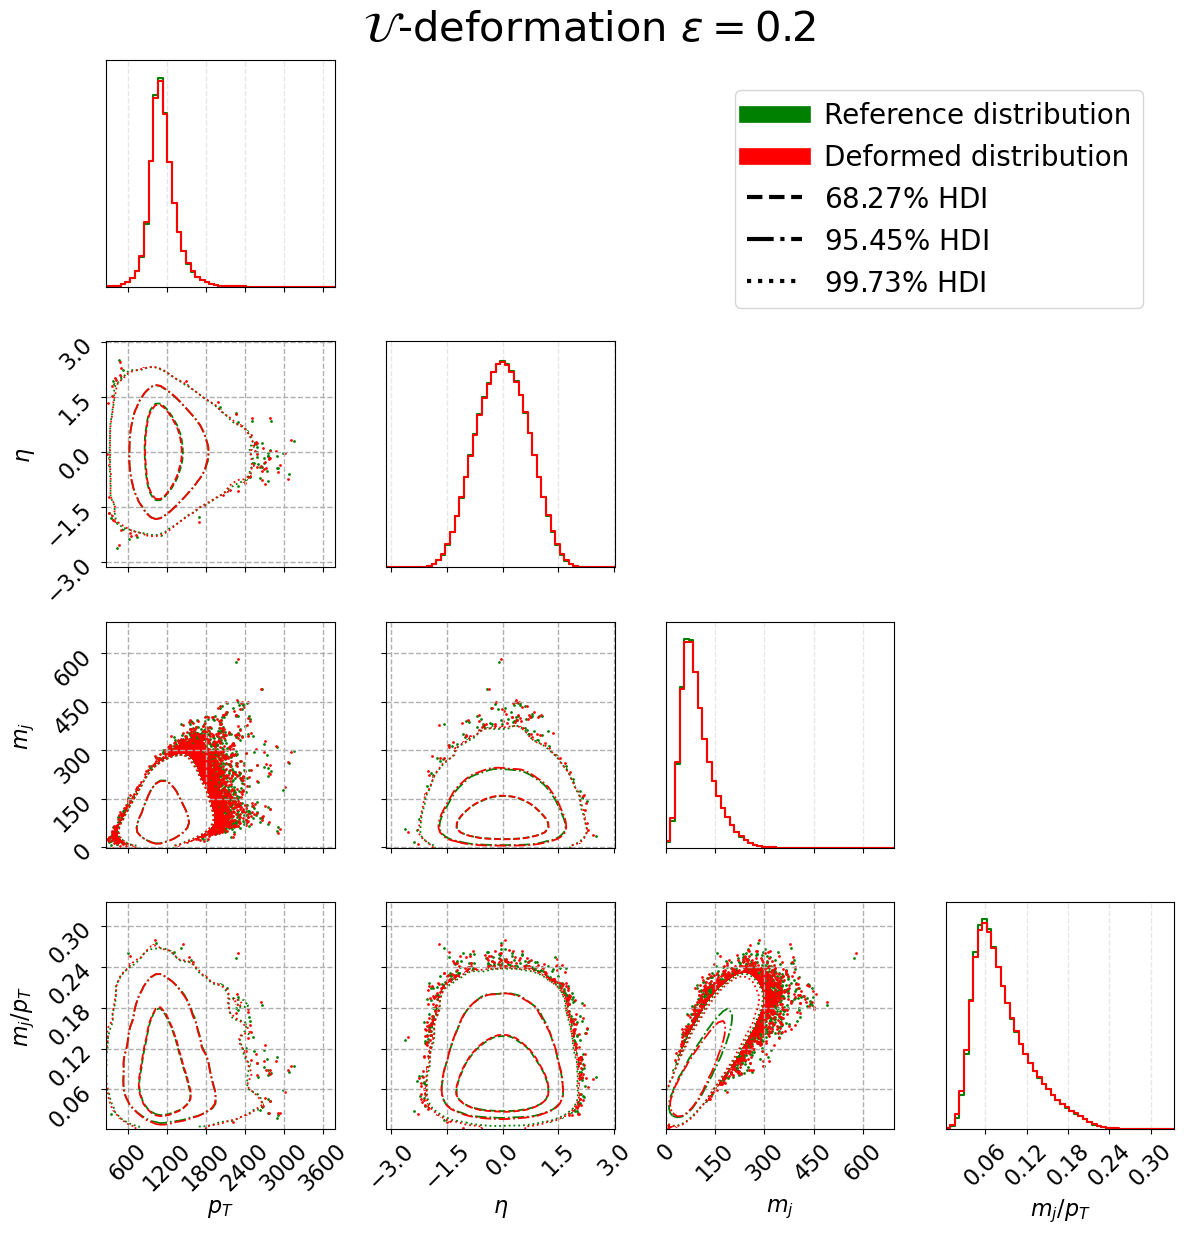

Plot done and saved in 3.4222759883850813 s.


In [12]:
ds = [jet_features_deform1_reduced.numpy(),
      jet_features_deform2_reduced.numpy(),
      jet_features_deform3_reduced.numpy(),
      jet_features_deform4_reduced.numpy(),
      jet_features_deform5_reduced.numpy(),
      jet_features_deform6_reduced.numpy(),
      jet_features_deform7_reduced.numpy()]

plot_titles = [r"$\mu$-deformation $\epsilon="+str(eps_mu)+"$",
               r"$\Sigma_{ij}$-deformation $\epsilon="+str(eps_sigma)+"$",
               r"$\Sigma_{i\neq j}$-deformation $\epsilon="+str(eps_sigma_off_diag)+"$",
               r"$\#^{+}$-deformation $\epsilon="+str(eps_power_plus)+"$",
               r"$\#^{-}$-deformation $\epsilon="+str(eps_power_minus)+"$",
               r"$\mathcal{N}$-deformation $\epsilon="+str(eps_shift_normal)+"$",
               r"$\mathcal{U}$-deformation $\epsilon="+str(eps_shift_uniform)+"$"]

for i in range(len(ds)):
    plot_corners(jet_features_reduced.numpy(),
                 ds[i],
                 max_points = 1_000_000,
                 max_dim = 32,
                 n_bins = 50,
                 w1 = None,
                 w2 = None,
                 sigma_contours = [1,2,3],
                 show_intervals_1d = False,
                 extend_range_percent = 20,
                 title1 = None,
                 title2 = None,
                 color1 = "green",
                 color2 = "red",
                 plot_title = plot_titles[i],
                 title_kwargs = {"fontsize": 30, "y": 1.03},
                 labels = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"],
                 legend_labels = [r"Reference distribution",
                                  r"Deformed distribution",
                                  r'$68.27\%$ HDI',
                                  r'$95.45\%$ HDI',
                                  r'$99.73\%$ HDI'],
                 legend_kwargs = {"fontsize": 20, "loc": (0.62,0.75)},
                 figdir = figures_dir,
                 figname = "corner_plot_def_"+str(i+1)+".png",
                 save = True,
                 show = True)

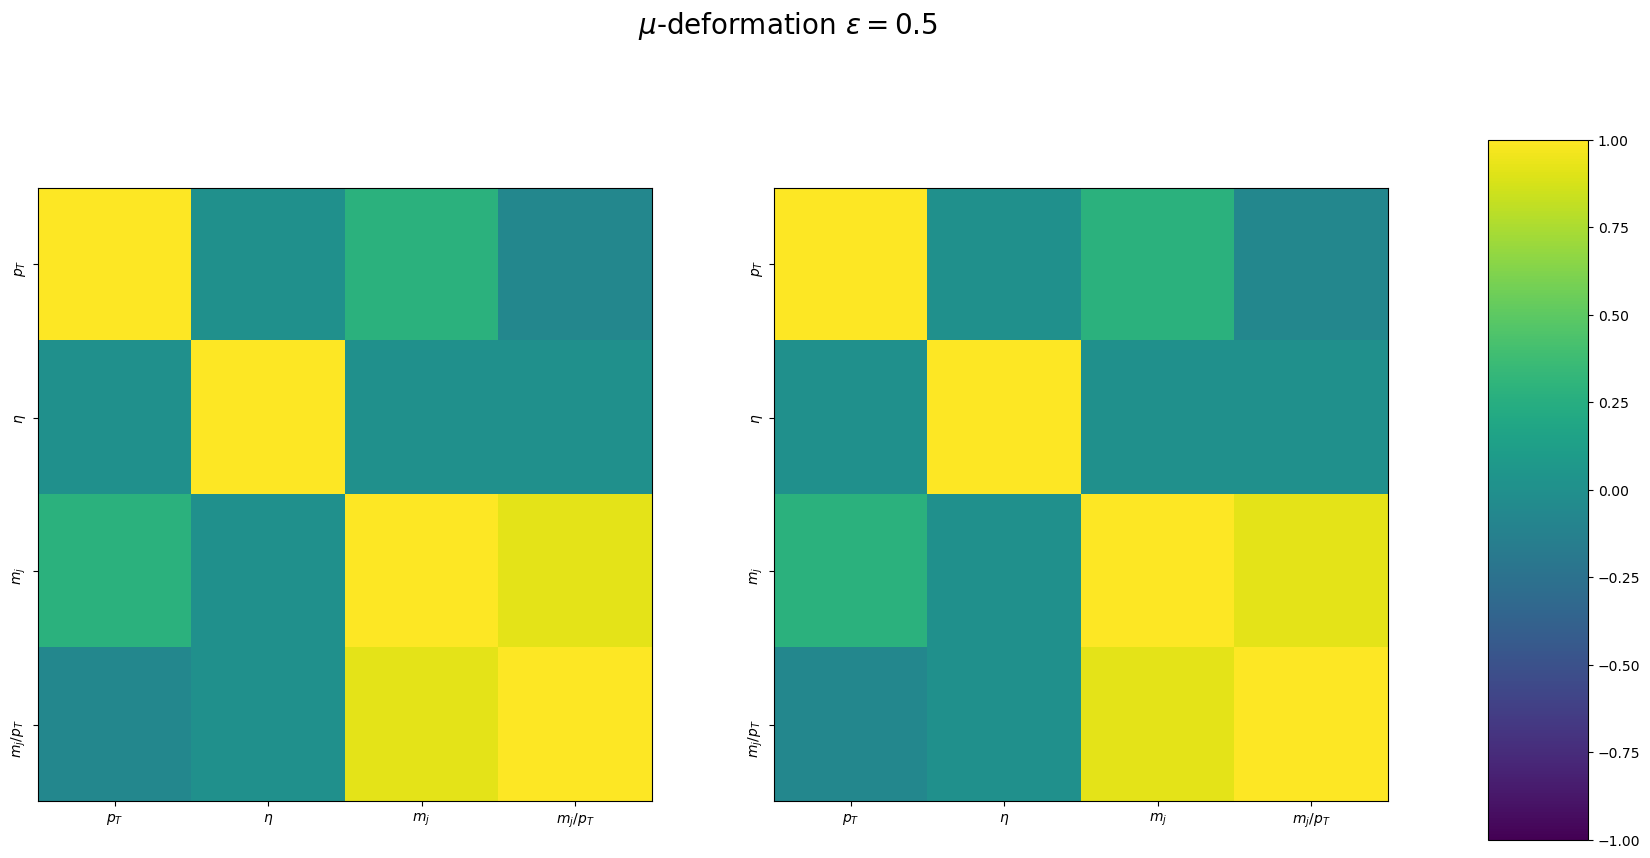

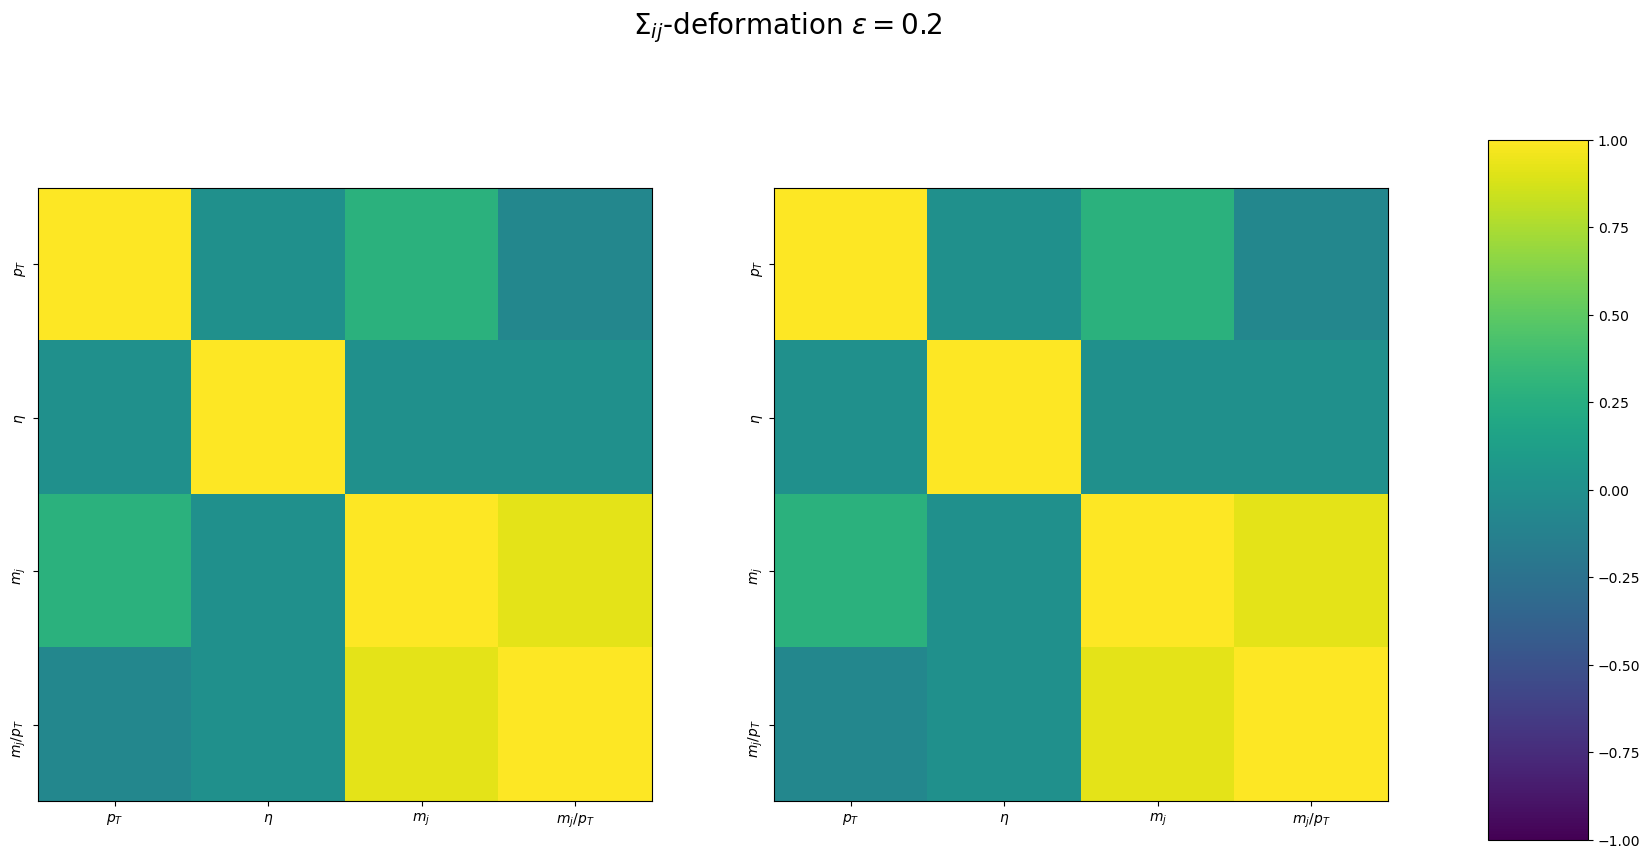

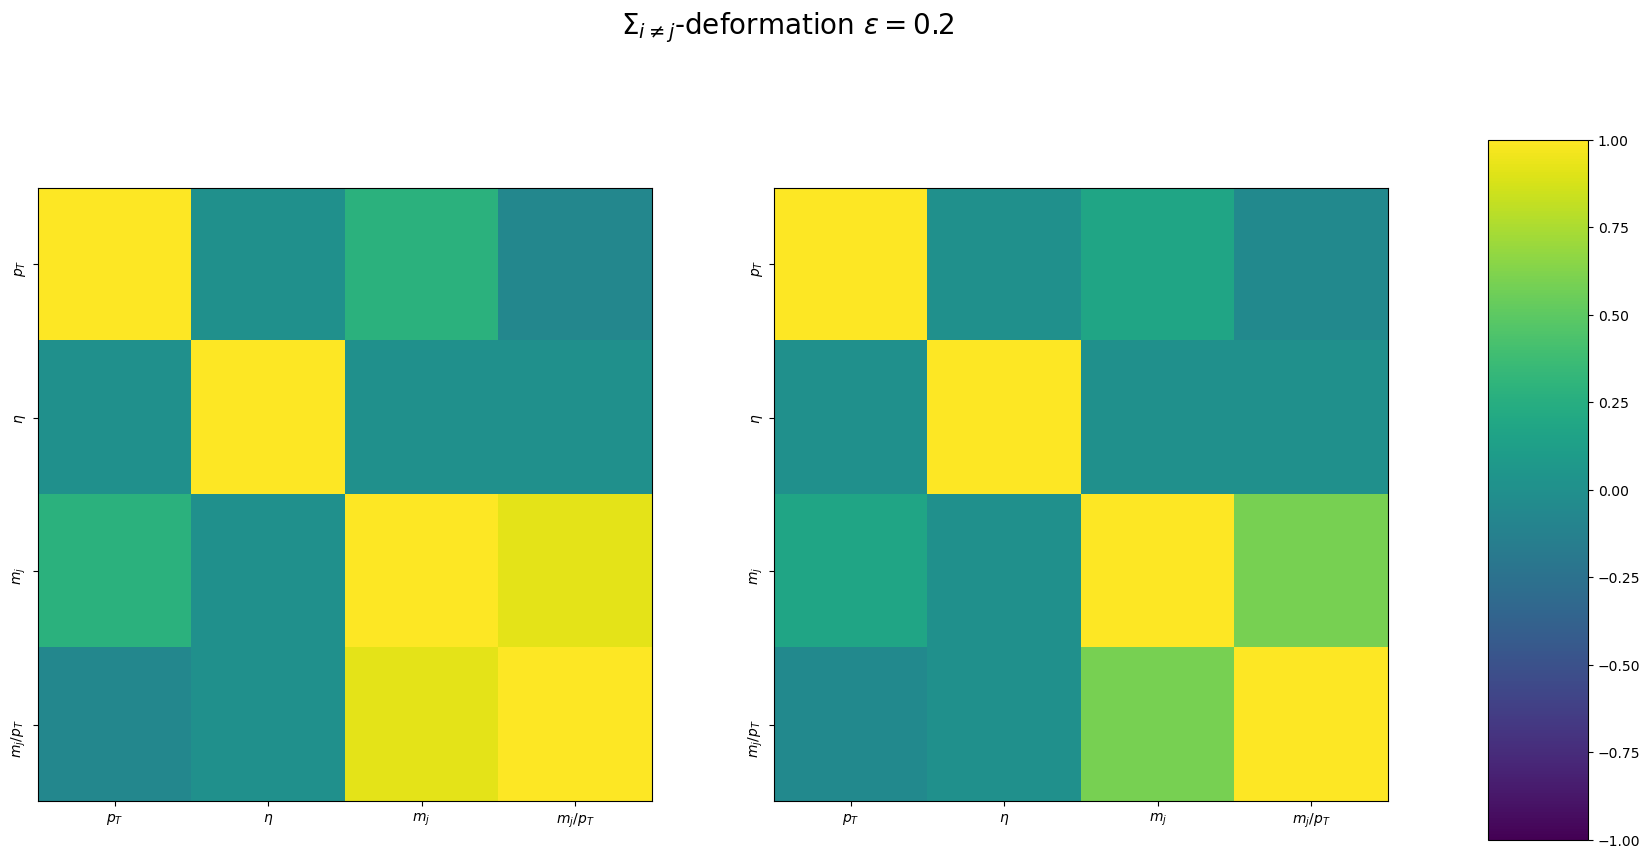

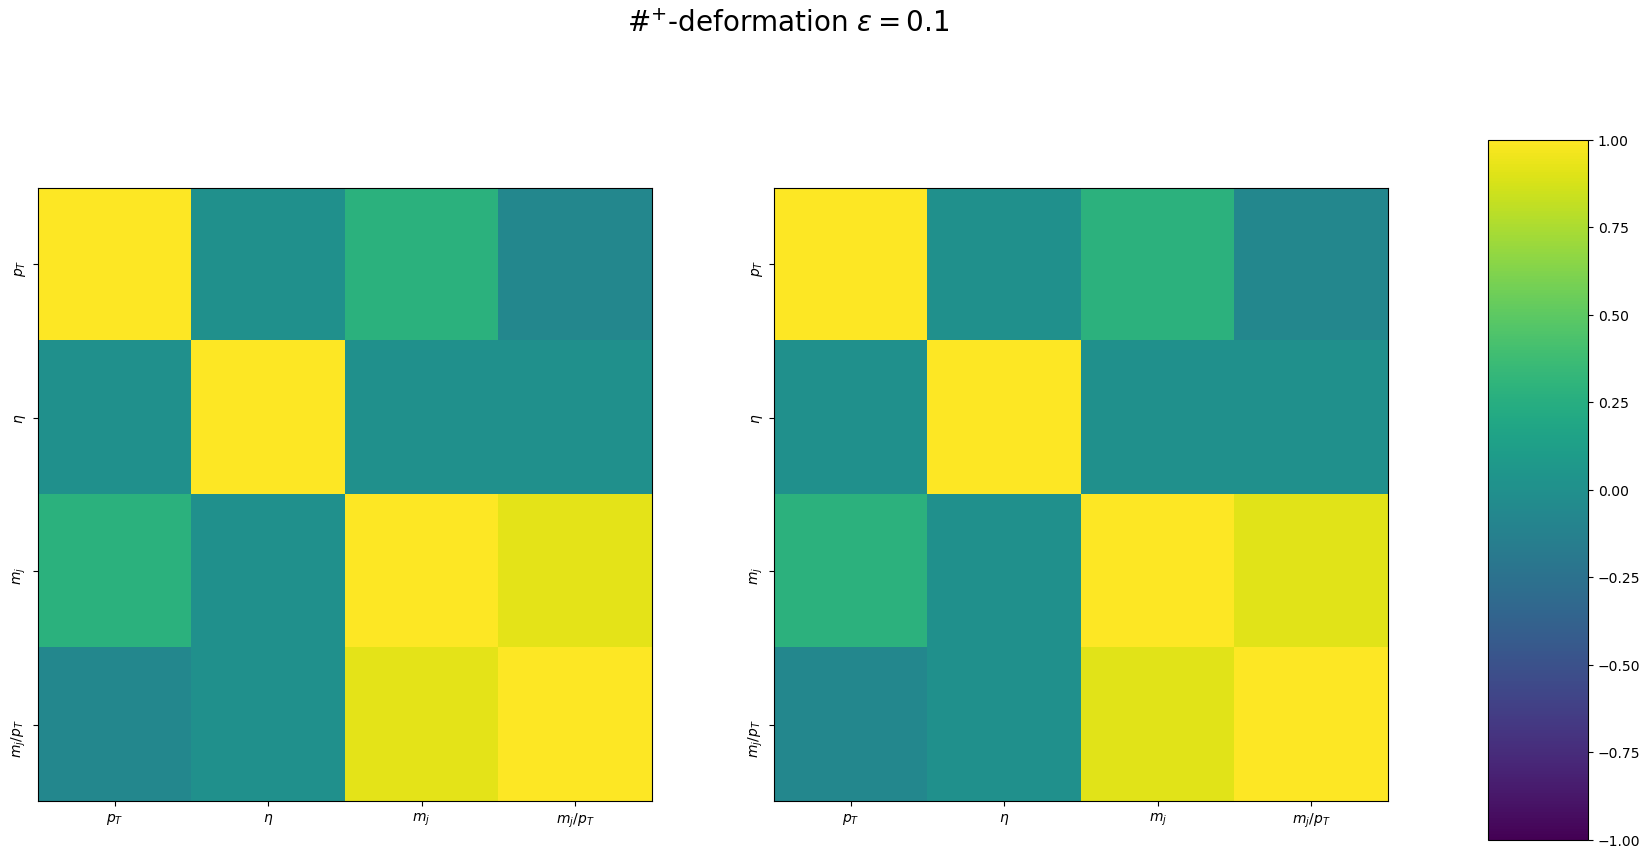

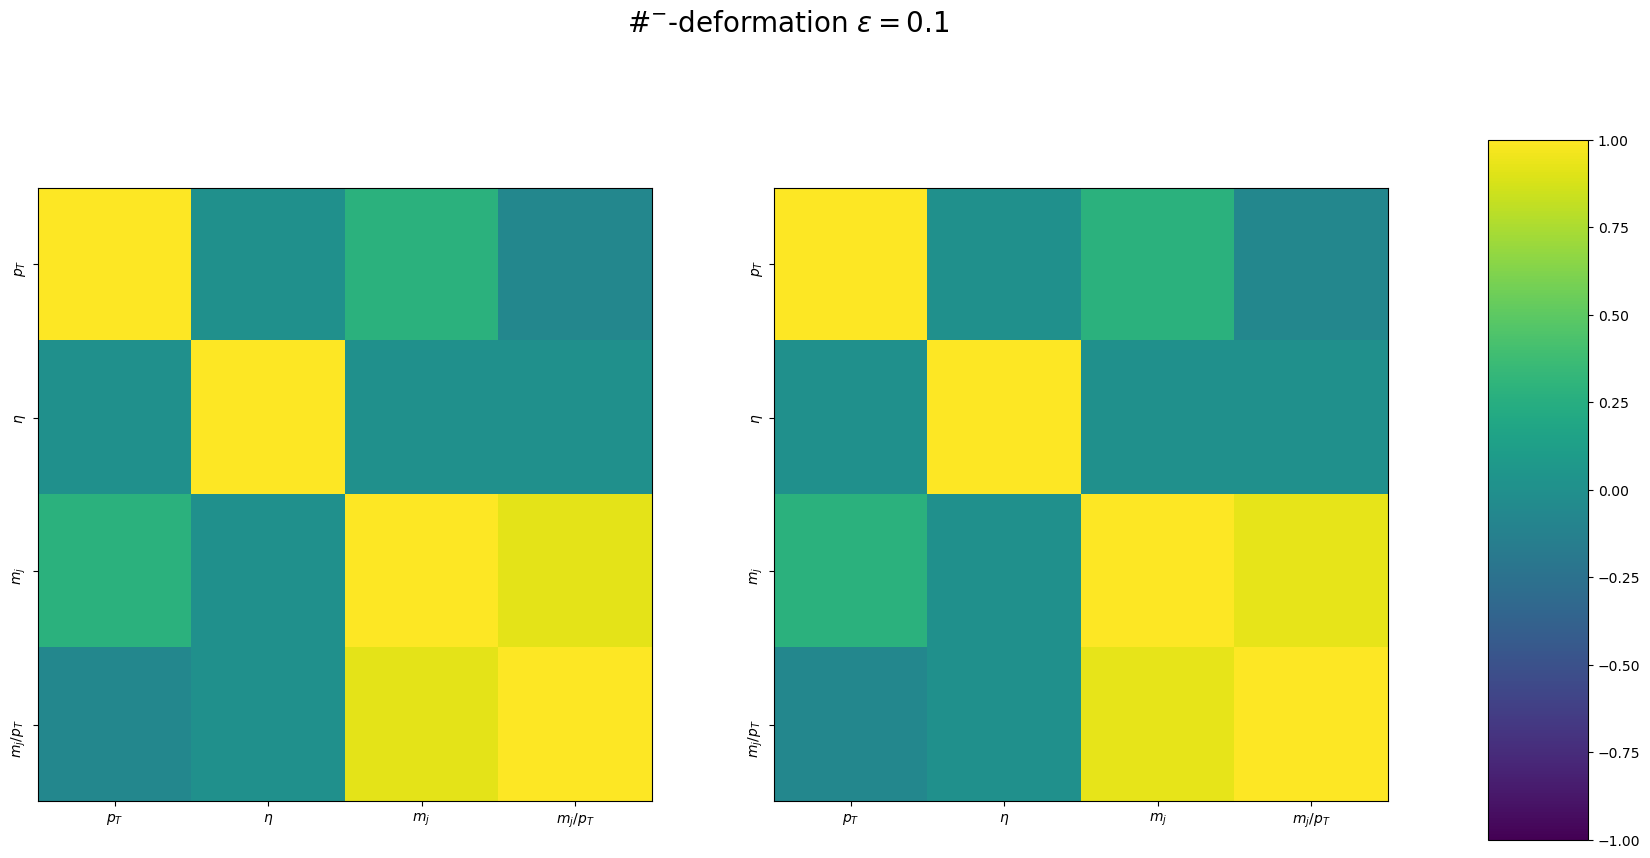

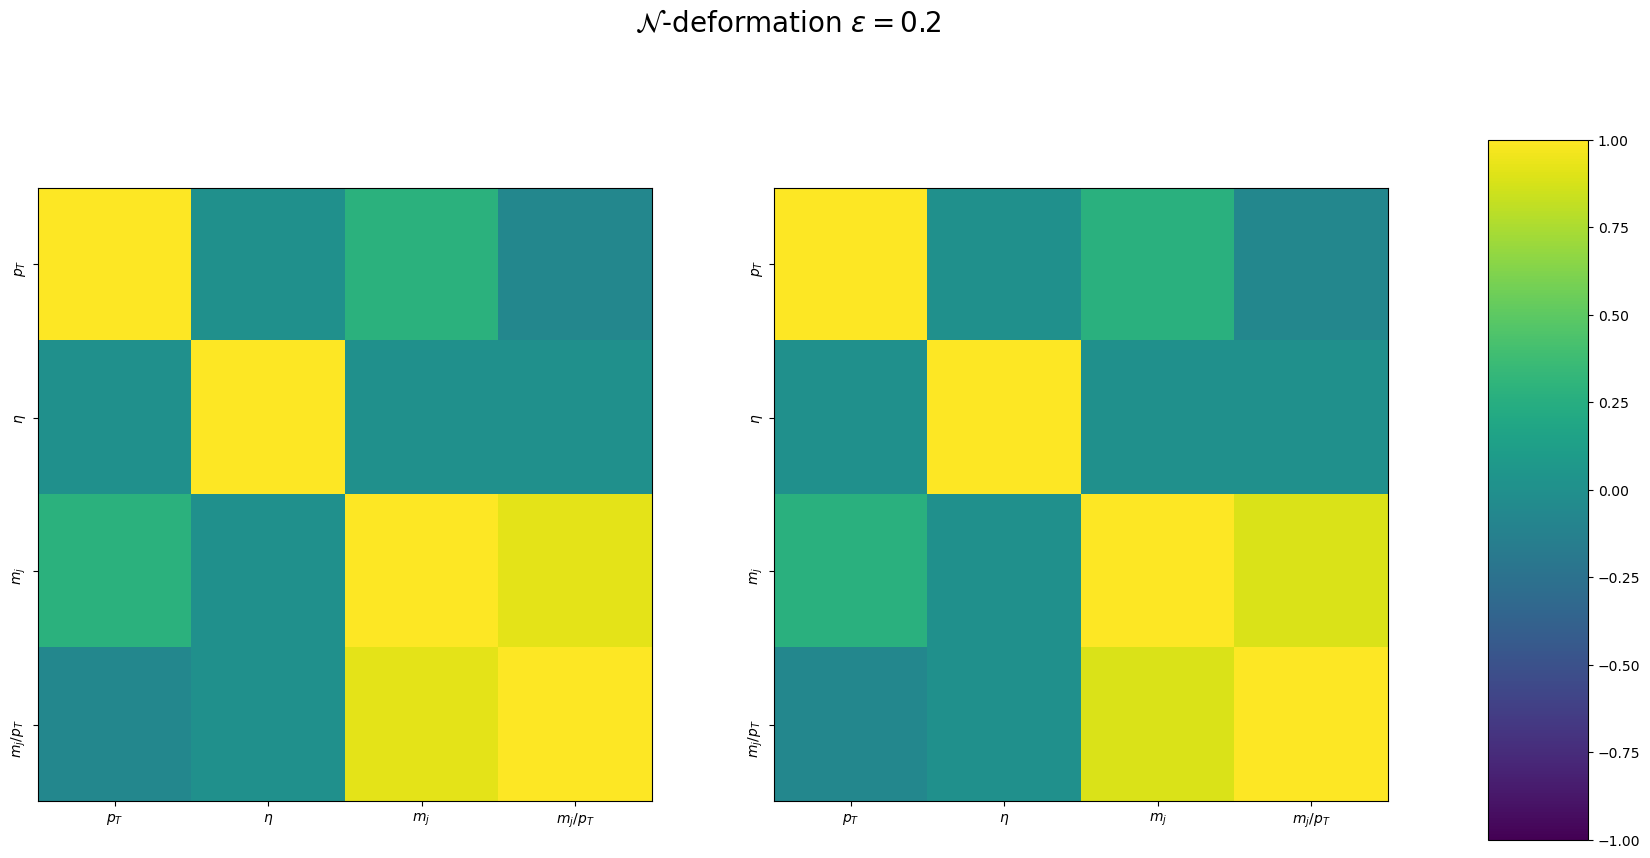

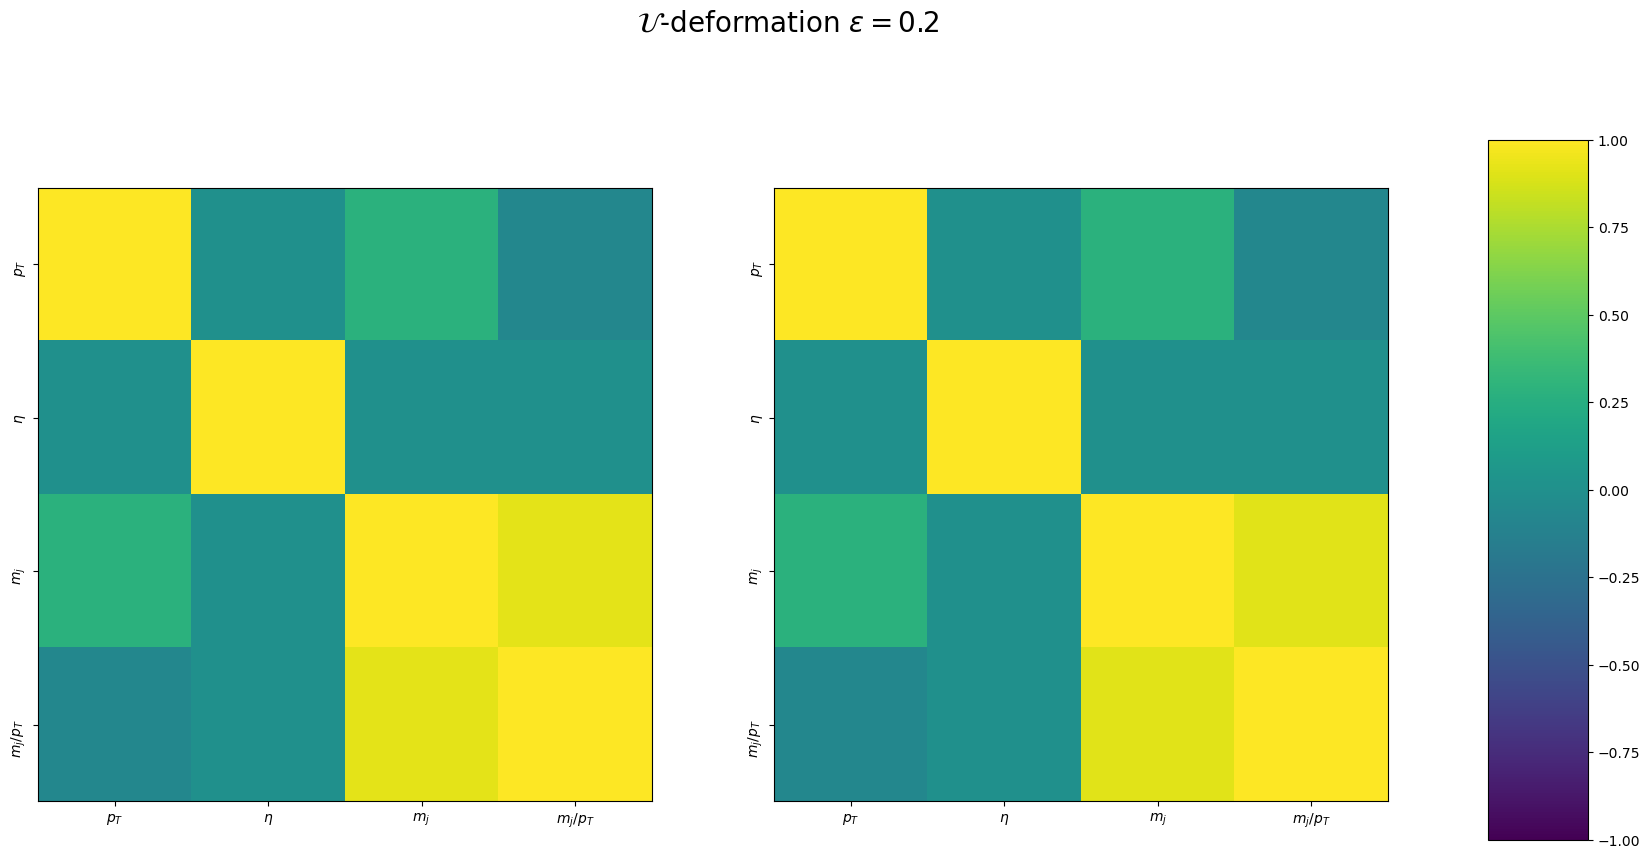

In [15]:
for i in range(len(ds)):
    plot_corr_matrix_side_by_side(dist_1 = jet_features_reduced.numpy(), 
                                  dist_2 = ds[i],
                                  path_to_plots = figures_dir, 
                                  figure_name = "corre_matrix_plot_def_"+str(i+1)+".pdf",
                                  max_points = 1_000_000,
                                  title = plot_titles[i],
                                  labels = [r"$p_{T}$", r"$\eta$", r"$m_{j}$", r"$m_{j}/p_{T}$"],
                                  show_labels = True,
                                  show = True,
                                  save = True)

## TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '10K/')
if not os.path.exists(model_dir):
    os.makedirs(tests_dir)
    
dataset = get_reduced_jet_features(jet_features)

### Bootstrapping Null Hypothesis

In [9]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

In [10]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 8, nbootstrap: 125
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [11]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0      8            10000            1000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  is_symb_1  ndims_1  \
0     0    True            False     None     True      False        4   

   nsamples_1  is_symb_2  ndims_2  nsamples_2    dtype  ndims  nsamples  \
0       80000      False        4       80000  float64      4     80000   

   small_sample  
0          True

In [12]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 8, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {"verbose": True}, 
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [13]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/jet_features/tests/10K/null_hypotheses/FGD.json
Loading mmd from results/jet_features/tests/10K/null_hypotheses/MMD.json
Loading ks from results/jet_features/tests/10K/null_hypotheses/KS.json
Loading sks from results/jet_features/tests/10K/null_hypotheses/SKS.json
Loading swd from results/jet_features/tests/10K/null_hypotheses/SWD.json


In [14]:
cl_list = [0.68, 0.95, 0.99]
null_times = []
ndims = 4

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [680, 319], 2.5616952190392253], [0.95, [950, 50], 43.65031824401678], [0.99, [990, 10], 76.53957586023517]]
Computing time for metric fgd: 734.1425946094096
ThresholdS for metric mmd: [[0.68, [680, 319], 2.072348841528525e+16], [0.95, [950, 50], 8.790557489209803e+18], [0.99, [990, 10], 1.8362308428518392e+19]]
Computing time for metric mmd: 719.8090053433552
ThresholdS for metric ks: [[0.68, [680, 319], 0.9245422251402801], [0.95, [950, 50], 1.1649589125941537], [0.99, [990, 10], 1.3081486157250652]]
Computing time for metric ks: 329.04732348769903
ThresholdS for metric sks: [[0.68, [680, 319], 0.9412301380992669], [0.95, [950, 50], 1.252852345605477], [0.99, [990, 10], 1.4217093477706213]]
Computing time for metric sks: 963.3701429050416
ThresholdS for metric swd: [[0.68, [680, 319], 76.31109619673191], [0.95, [950, 50], 108.91621696369158], [0.99, [990, 10], 131.62261249456037]]
Computing time for metric swd: 217.62040791474283


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                  {'verbose': True}  statistic_means   
3  {'nslices': 100, 'seed_slicing': 0, 'verbose':...     metric_means   
4  {'nslices': 100, 'seed_slicing': 0, 'verbose':...     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f51344640d0>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f5134464040>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f5134466290>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f5134466320>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f51344663b0>  lambda ns, ndims: np.sqrt(ns/ndims)   

                                         test_config  max_vectorize  \
0  {'niter': 8, 'batch_size_test': 10000, 'batch_...           3200   
1  {'niter': 8, 'batch_size_test': 10000, 'batch_...              8   
2  {'niter': 8, 'batch_size_test': 10000, 'batch_...           3200   
3  {'niter': 8, 'batch_size_test': 10000, 'batch_...            100   
4  {'niter': 8, 'batch_size_test': 10000, 'batch_...            100   

                latex                                          null_file  \
0  $d_{\mathrm{FGD}}$  results/jet_features/tests/10K/null_hypotheses...   
1  $d_{\mathrm{MMD}}$  results/jet_features/tests/10K/null_hypotheses...   
2      $\overline{D}$  results/jet_features/tests/10K/null_hypotheses...   
3     $\widetilde{D}$  results/jet_features/tests/10K/null_hypotheses...   
4     $\widetilde{W}$  results/jet_features/tests/10K/null_hypotheses...   

                                          thresholds  
0  [[0.68, [680, 319], 2.5616952190392253], [0.95...  
1  [[0.68, [680, 319], 2.072348841528525e+16], [0...  
2  [[0.68, [680, 319], 0.9245422251402801], [0.95...  
3  [[0.68, [680, 319], 0.9412301380992669], [0.95...  
4  [[0.68, [680, 319], 76.31109619673191], [0.95,...

#### Plots of null-distributions

mu = 7.923662025435984 +/- 9.773727708294524
sigma = 17.58045528093868 +/- 1.3541663415201104
68%CL = 2.5616952190392253, 95%CL = 43.65031824401678, 99%CL = 76.53957586023517
mu = 7.923662025435984 +/- 9.773727708294524
sigma = 17.58045528093868 +/- 1.3541663415201104


/tmp/ipykernel_23025/846112112.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_23025/846112112.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_23025/846112112.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


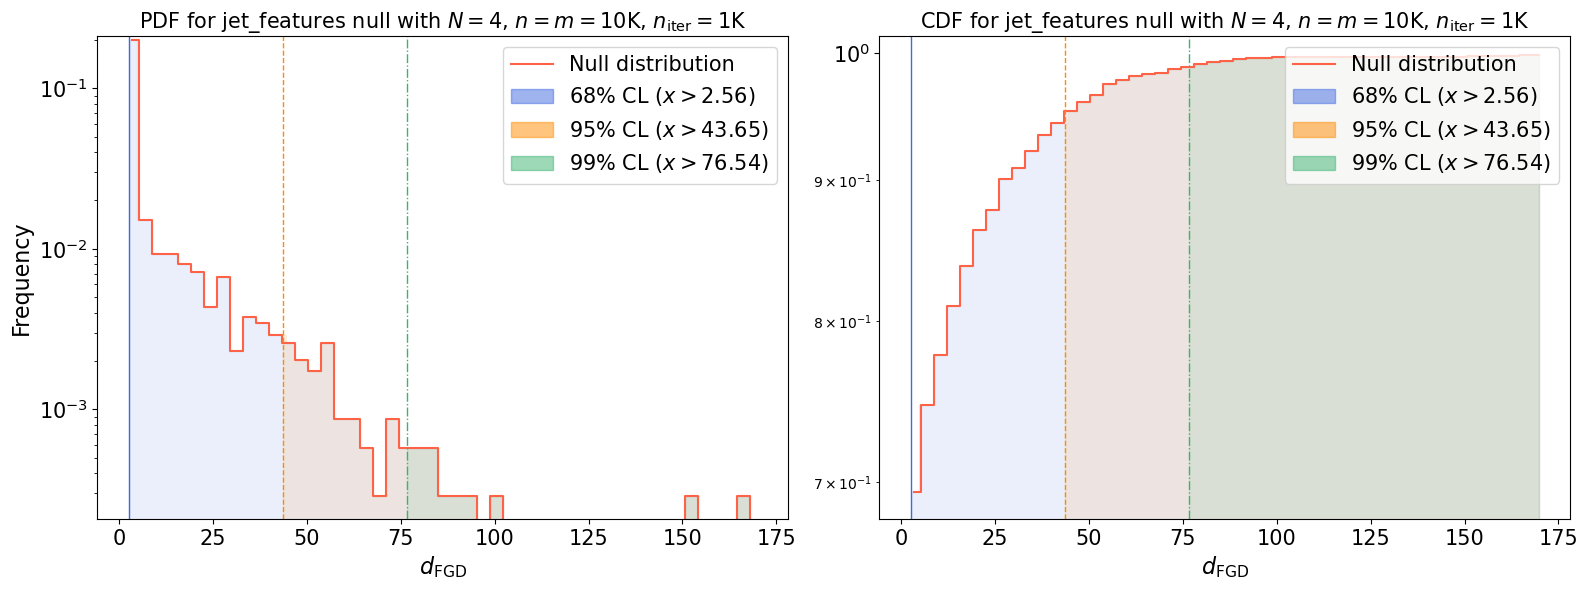

Time elapsed: 1.3441477715969086 seconds.
mu = 1.627229259161697e+17 +/- 7.024893990183836e+35
sigma = 4.713243610318636e+18 +/- 3.233346955118391e+17
68%CL = 2.072348841528525e+16, 95%CL = 8.790557489209803e+18, 99%CL = 1.8362308428518392e+19
mu = 1.627229259161697e+17 +/- 7.024893990183836e+35
sigma = 4.713243610318636e+18 +/- 3.233346955118391e+17


/tmp/ipykernel_23025/846112112.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_23025/846112112.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_23025/846112112.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


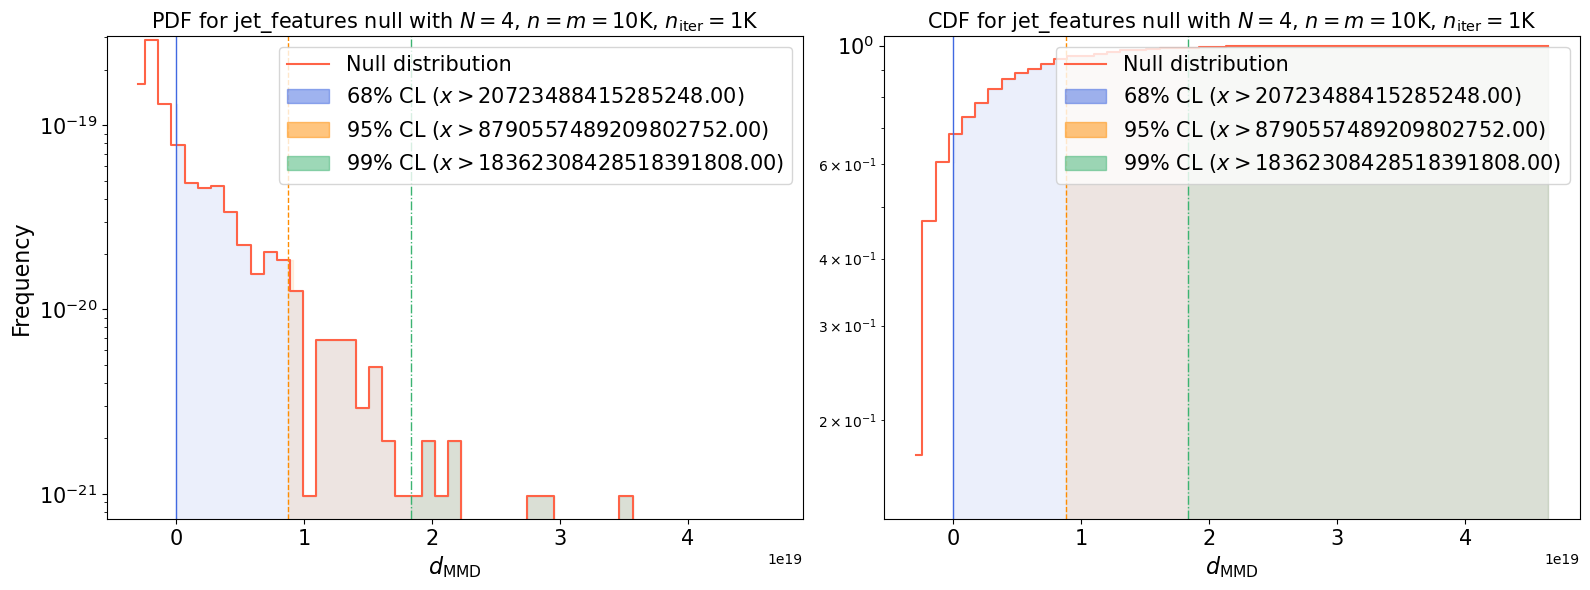

Time elapsed: 1.5048211328685284 seconds.
mu = 0.8722713954511667 +/- 0.0007419902874814465
sigma = 0.15317895776393348 +/- 0.00372270332758937
68%CL = 0.9245422251402801, 95%CL = 1.1649589125941537, 99%CL = 1.3081486157250652
mu = 0.8722713954511667 +/- 0.0007419902874814465
sigma = 0.15317895776393348 +/- 0.00372270332758937


/tmp/ipykernel_23025/846112112.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_23025/846112112.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_23025/846112112.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_23025/846112112.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


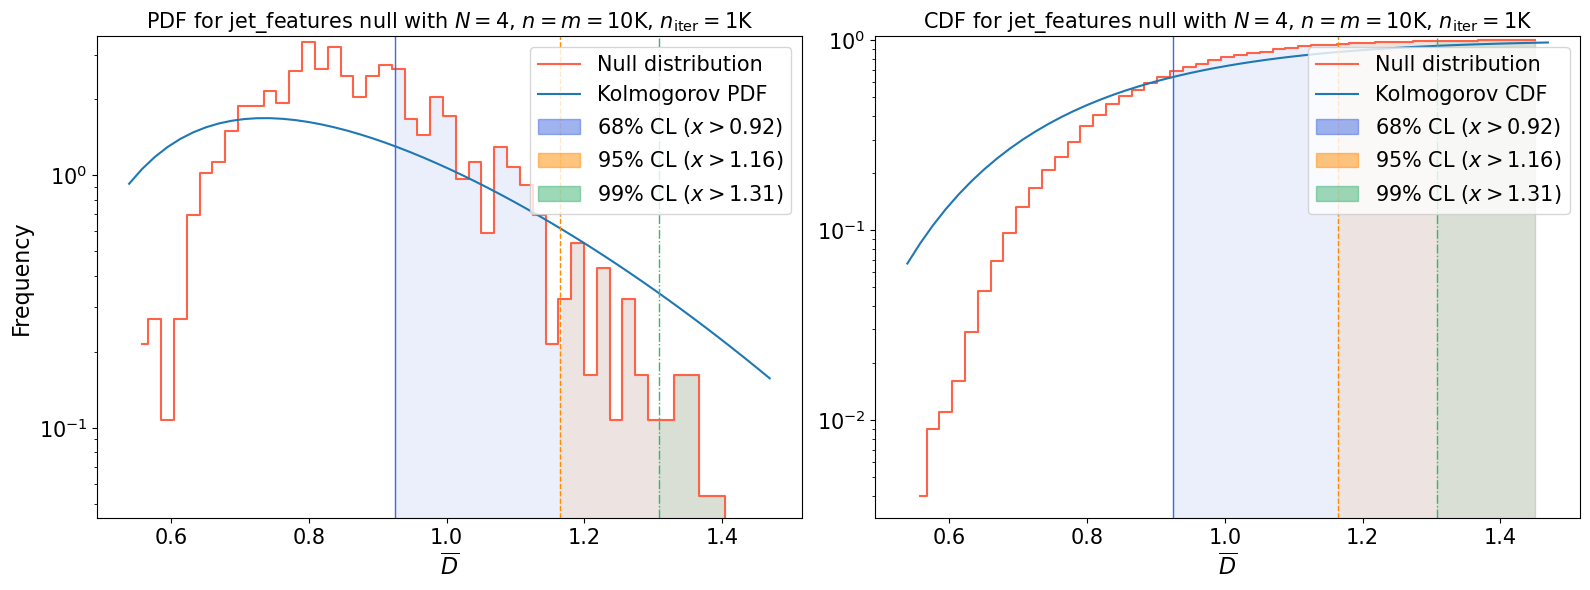

Time elapsed: 1.5123230712488294 seconds.
mu = 0.8767742398531049 +/- 0.001193529577409658
sigma = 0.19427485476491207 +/- 0.004789639980120085
68%CL = 0.9412301380992669, 95%CL = 1.252852345605477, 99%CL = 1.4217093477706213
mu = 0.8767742398531049 +/- 0.001193529577409658
sigma = 0.19427485476491207 +/- 0.004789639980120085


/tmp/ipykernel_23025/846112112.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_23025/846112112.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_23025/846112112.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_23025/846112112.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


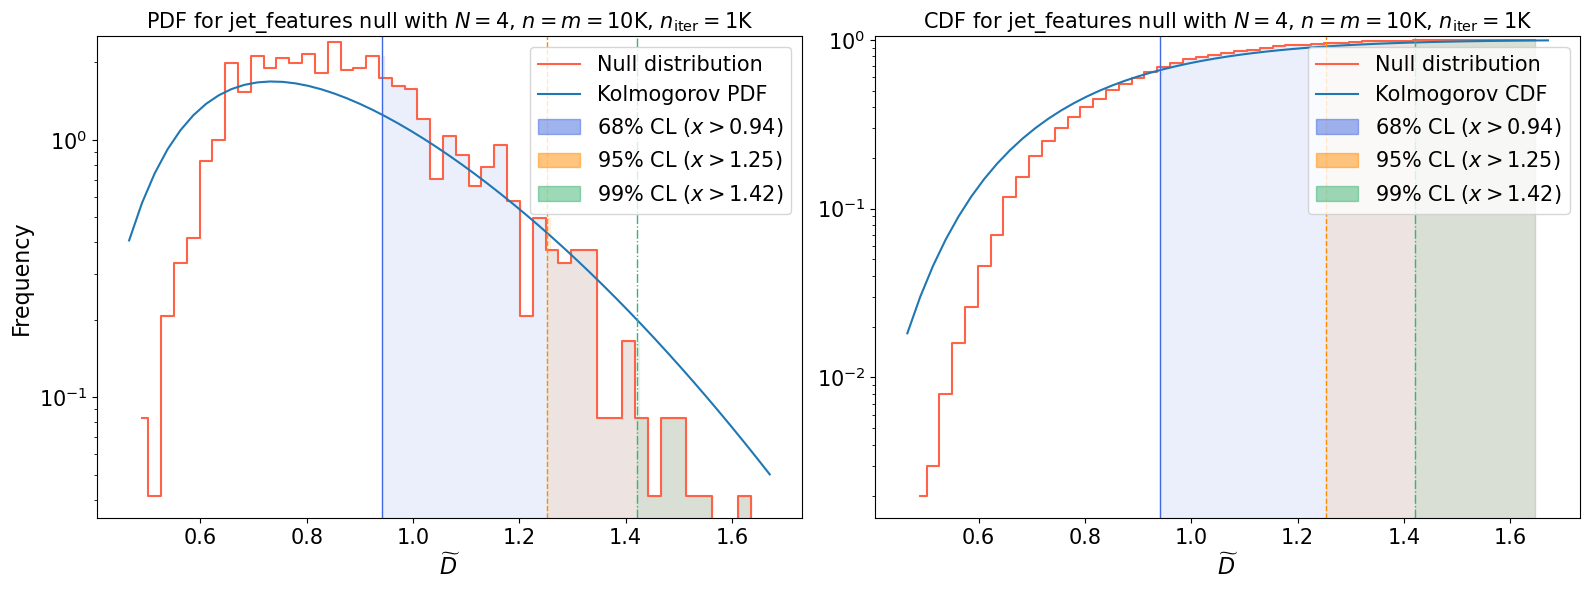

Time elapsed: 1.143141858279705 seconds.
mu = 70.35516464898022 +/- 12.331391233966253
sigma = 19.74722335366865 +/- 0.566573594287977
68%CL = 76.31109619673191, 95%CL = 108.91621696369158, 99%CL = 131.62261249456037
mu = 70.35516464898022 +/- 12.331391233966253
sigma = 19.74722335366865 +/- 0.566573594287977


/tmp/ipykernel_23025/846112112.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_23025/846112112.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_23025/846112112.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_23025/846112112.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


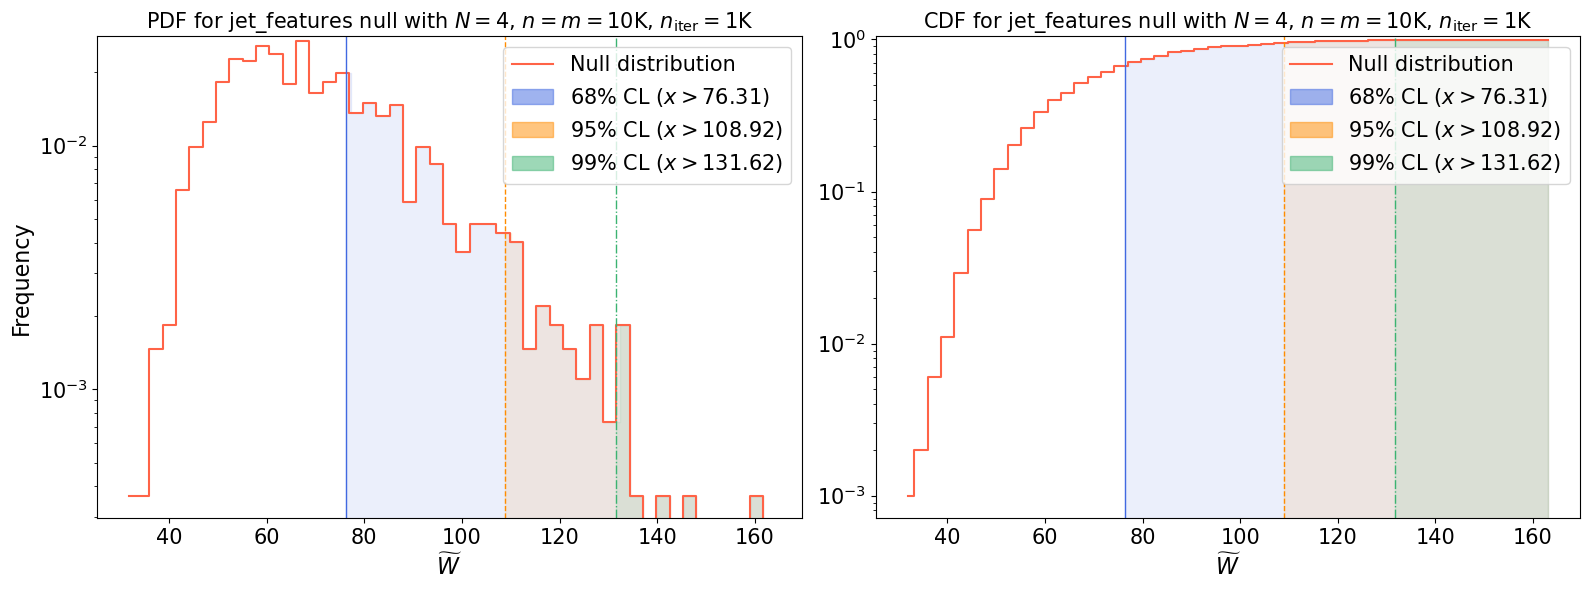

Time elapsed: 0.8740741778165102 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f4f05868430>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f4f058681f0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f4f0586a290>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f4f0586a320>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f4f0586a3b0>  lambda ns, ndims: np.sqrt(ns/ndims)   

                                         test_config  max_vectorize  \
0  {'niter': 8, 'batch_size_test': 10000, 'batch_...           3200   
1  {'niter': 8, 'batch_size_test': 10000, 'batch_...              8   
2  {'niter': 8, 'batch_size_test': 10000, 'batch_...           3200   
3  {'niter': 8, 'batch_size_test': 10000, 'batch_...            100   
4  {'niter': 8, 'batch_size_test': 10000, 'batch_...            100   

                latex                                          null_file  \
0  $d_{\mathrm{FGD}}$  results/jet_features/tests/10K/null_hypotheses...   
1  $d_{\mathrm{MMD}}$  results/jet_features/tests/10K/null_hypotheses...   
2      $\overline{D}$  results/jet_features/tests/10K/null_hypotheses...   
3     $\widetilde{D}$  results/jet_features/tests/10K/null_hypotheses...   
4     $\widetilde{W}$  results/jet_features/tests/10K/null_hypotheses...   

                                          thresholds  \
0  [[0.68, [680, 319], 2.5616952190392253], [0.95...   
1  [[0.68, [680, 319], 2.072348841528525e+16], [0...   
2  [[0.68, [680, 319], 0.9245422251402801], [0.95...   
3  [[0.68, [680, 319], 0.9412301380992669], [0.95...   
4  [[0.68, [680, 319], 76.31109619673191], [0.95,...   

                                         null_figure  
0  results/jet_features/tests/10K/null_hypotheses...  
1  results/jet_features/tests/10K/null_hypotheses...  
2  results/jet_features/tests/10K/null_hypotheses...  
3  results/jet_features/tests/10K/null_hypotheses...  
4  results/jet_features/tests/10K/null_hypotheses...

In [15]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Frequency', fontsize=16)
    ax[0].set_title('PDF for jet_features null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter_tot/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for jet_features null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter_tot/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

#### Scan and exclusion limits (bisection method)

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100, # this will be adapted to the boostrap size
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [16]:
file_path = os.path.join(model_dir, "exclusion_limits.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [17]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        eps_max = 1.
        for bound in bounds:
            try:
                result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
            except:
                result = {}
            if result == {}:
                print(f"Computing {bound} bounds for {metric_config['name']} with {deformation} deformation.")
                result = compute_exclusion_bisection_dataset(dataset = dataset,
                                                             metric_config = metric_config,
                                                             test_kwargs = test_kwargs,
                                                             model_dir = model_dir,
                                                             deformation = deformation,
                                                             seed_dist = 0,
                                                             x_tol = 0.01,
                                                             fn_tol = 0.05,
                                                             bound = bound,
                                                             eps_min = 0.,
                                                             eps_max = eps_max,
                                                             max_iterations = 50,
                                                             save = True,
                                                             filename = "exclusion_limits.json",
                                                             verbose = True)
                eps_max = list(result.values())[0]["exclusion_list"][-1][3]
            else:
                print(f"{bound.capitalize()} bounds for {metric_config['name']} with {deformation} deformation already loaded.")
            global_results.update(result)
print(global_results.keys())

Upper bounds for fgd with mean deformation already loaded.
Central bounds for fgd with mean deformation already loaded.
Lower bounds for fgd with mean deformation already loaded.
Upper bounds for fgd with cov_diag deformation already loaded.
Central bounds for fgd with cov_diag deformation already loaded.
Lower bounds for fgd with cov_diag deformation already loaded.
Upper bounds for fgd with cov_off_diag deformation already loaded.
Central bounds for fgd with cov_off_diag deformation already loaded.
Lower bounds for fgd with cov_off_diag deformation already loaded.
Upper bounds for fgd with power_abs_up deformation already loaded.
Central bounds for fgd with power_abs_up deformation already loaded.
Lower bounds for fgd with power_abs_up deformation already loaded.
Upper bounds for fgd with power_abs_down deformation already loaded.
Central bounds for fgd with power_abs_down deformation already loaded.
Lower bounds for fgd with power_abs_down deformation already loaded.
Upper bounds fo